### Performance Analysis of FOUR programs with perf

#### Workload Descriptions  

1. **CPU-Bound (Prime Number Calculation)**  
   - Defines **N = 100,000**, indicating computation over a large range.  
   - Uses **6 threads** to parallelize prime number determination.  
   - Heavy on **CPU cycles**, minimal memory or I/O interaction.  
   - Performance depends on **CPU speed** and **thread scheduling efficiency**.  

2. **Memory-Bound (Array Modification)**  
   - Defines **N = 100,000**, representing a large array.  
   - Uses **6 threads** to modify array elements in parallel.  
   - Intensive on **memory bandwidth**, with frequent cache interactions.  
   - Performance is influenced by **cache efficiency** and **memory latency**.  

3. **I/O-Bound (File Read & Write)**  
   - Defines **NUM_OPERATIONS = 100,000**, implying heavy file operations.  
   - Uses **6 threads** for simultaneous reading and writing.  
   - Performance bottlenecked by **disk I/O speed** and **system file handling**.  
   - High **context switching** due to waiting on I/O operations.  

4. **Mixed Workload (Computation, Memory, and I/O)**  
   - Combines all three workloads.  
   - Defines **N = 100,000**, **ARRAY_SIZE = 100,000**, and **NUM_OPERATIONS = 100,000**.  
   - Uses **6 threads** to execute **prime calculations, array modifications, and file I/O**.  
   - Performance affected by **CPU usage, cache performance, and disk access latency**.  
   - Most complex, stressing all system resources simultaneously.


#### **1. Summary of CPU-Bound Program (Prime Number Calculation)**  

This **multithreaded C program** calculates prime numbers up to **N = 100,000** using the **pthread** library. The program:  

1. **Divides the range** of numbers among **user-specified threads** (given as a command-line argument).  
2. **Each thread** checks for prime numbers in its assigned range using the `primeCheck()` function.  
3. Uses **POSIX `clock_gettime()`** to measure execution time.  
4. Prompts the user to **display prime numbers** if desired.  

#### **2. Summary of Memory-Bound Program (Array Modification)**  

This **multithreaded C program** simulates a **memory-intensive workload** by modifying a dynamically allocated array of **N = 100,000** integers using **pthreads**.  

##### **Program Flow**  
1. **Allocates memory** for an array of size `N`.  
2. **Initializes the array** with random values.  
3. **Divides the workload** among **user-specified threads** (given as a command-line argument).  
4. **Each thread increments array elements** in its assigned range.  
5. Uses **POSIX `clock_gettime()`** to measure execution time.  
6. **Frees allocated memory** before exiting.


#### **3. Summary of I/O-Bound Program (File Read & Write)**  

This **multithreaded C program** simulates an **I/O-bound workload** by performing **frequent file read and write operations** using **pthreads**.  

##### **Program Flow**  
1. **Each thread creates a unique file (`file_X.txt`)** and writes `NUM_OPERATIONS` lines to it.  
2. After writing, the thread **reads the file, converts text to uppercase, and writes it to a new file (`output_X.txt`)**.  
3. Uses **POSIX `clock_gettime()`** to measure execution time.  
4. **Threads run in parallel**, each handling its own file.  

#### **4. Summary of Mixed Workload Program**  

This **multithreaded C program** represents a **mixed workload** by executing **CPU-bound, memory-bound, and I/O-bound tasks** simultaneously using **pthreads**.  

##### **Program Flow**  
1. **CPU-bound computation**:  
   - A subset of threads performs **prime number checking** (compute-intensive).  
2. **Memory-bound operations**:  
   - Another subset modifies a **large array** in memory.  
3. **I/O-bound operations**:  
   - Remaining threads **read and write** from files, converting text to uppercase.  
4. Uses **POSIX `clock_gettime()`** to measure execution time.  
5. **Threads are divided among the three workloads** to create a realistic system stress test.  

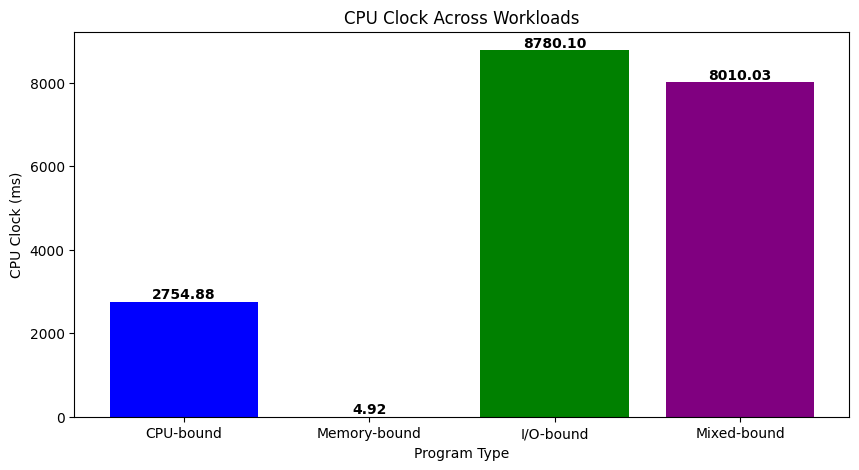

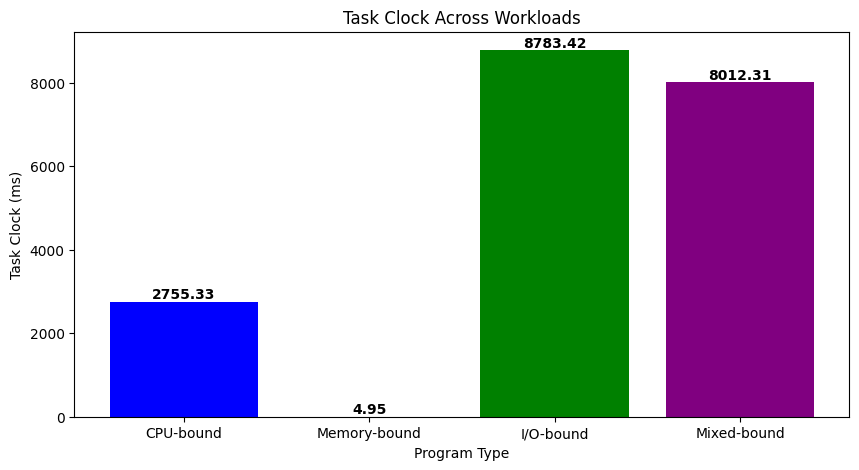

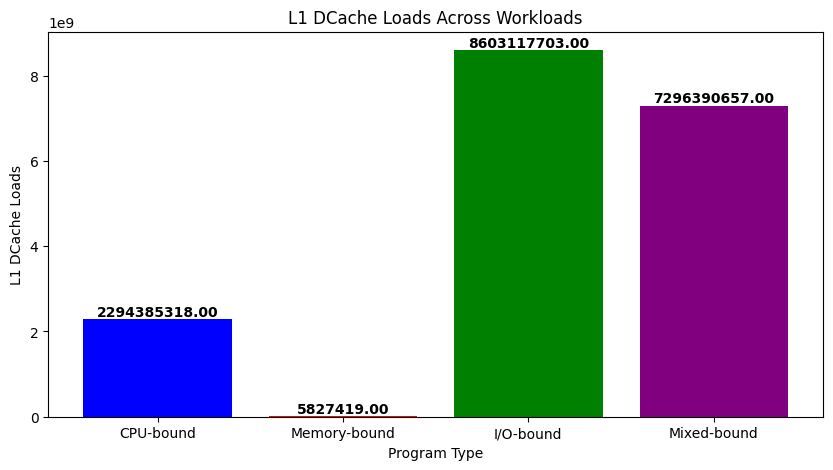

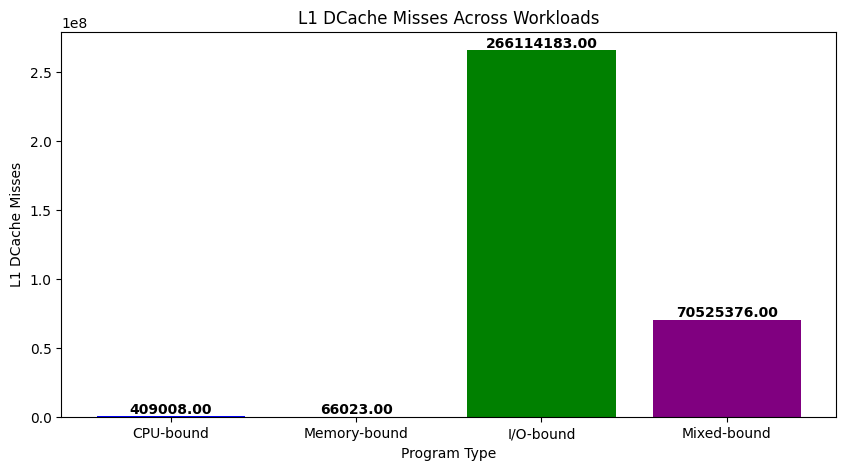

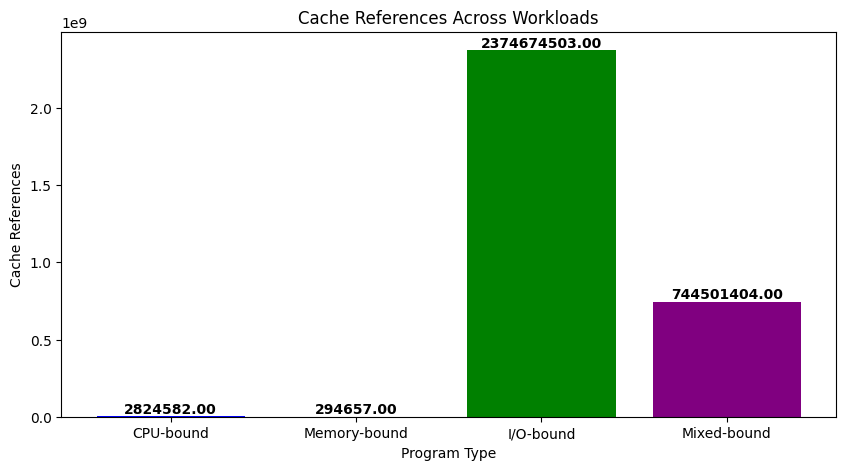

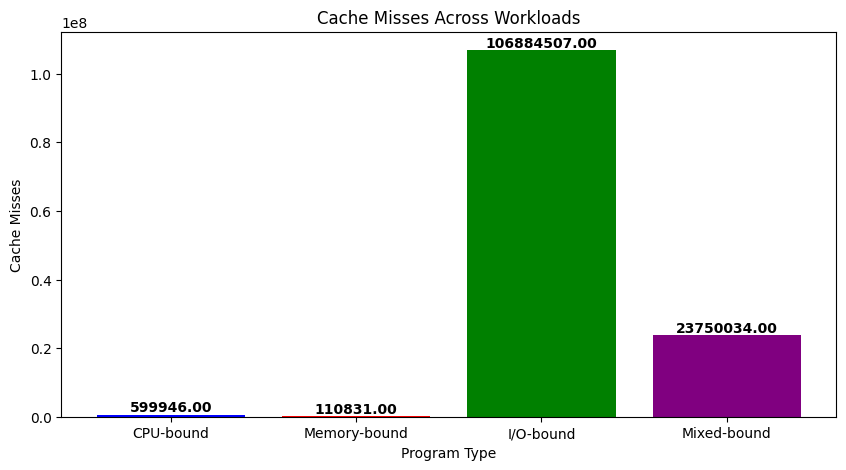

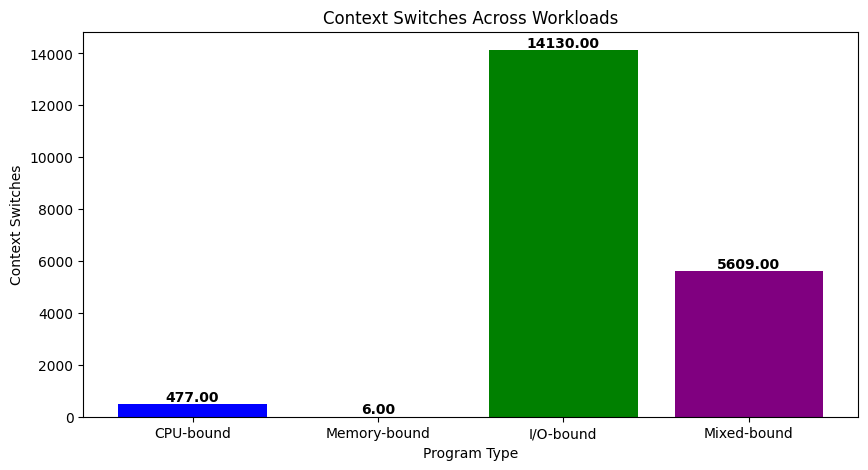

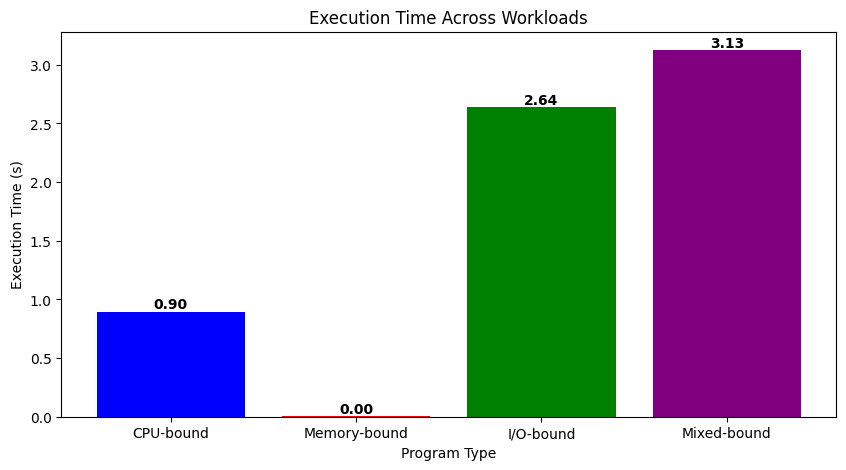

,Program,CPU Clock (ms),Task Clock (ms),L1 DCache Loads,L1 DCache Misses,Cache References,Cache Misses,Context Switches,Execution Time (s)
0,CPU-bound,2754.88,2755.33,2294385318,409008,2824582,599946,477,0.8966
1,Memory-bound,4.92,4.95,5827419,66023,294657,110831,6,0.0049
2,I/O-bound,8780.10,8783.42,8603117703,266114183,2374674503,106884507,14130,2.6401
3,Mixed-bound,8010.03,8012.31,7296390657,70525376,744501404,23750034,5609,3.1255


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Updated performance data
data = {
    'Program': ['CPU-bound', 'Memory-bound', 'I/O-bound', 'Mixed-bound'],
    'CPU Clock (ms)': [2754.88, 4.92, 8780.10, 8010.03],
    'Task Clock (ms)': [2755.33, 4.95, 8783.42, 8012.31],
    'L1 DCache Loads': [2294385318, 5827419, 8603117703, 7296390657],
    'L1 DCache Misses': [409008, 66023, 266114183, 70525376],
    'Cache References': [2824582, 294657, 2374674503, 744501404],
    'Cache Misses': [599946, 110831, 106884507, 23750034],
    'Context Switches': [477, 6, 14130, 5609],
    'Execution Time (s)': [0.8966, 0.0049, 2.6401, 3.1255]
}

df = pd.DataFrame(data)

# Function to plot bar graphs with values on top
def plot_bar_chart(column, ylabel, title):
    plt.figure(figsize=(10, 5))
    bars = plt.bar(df['Program'], df[column], color=['blue', 'red', 'green', 'purple'])
    plt.xlabel('Program Type')
    plt.ylabel(ylabel)
    plt.title(title)

    # Add values on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.show()

# Generate plots
plot_bar_chart('CPU Clock (ms)', 'CPU Clock (ms)', 'CPU Clock Across Workloads')
plot_bar_chart('Task Clock (ms)', 'Task Clock (ms)', 'Task Clock Across Workloads')
plot_bar_chart('L1 DCache Loads', 'L1 DCache Loads', 'L1 DCache Loads Across Workloads')
plot_bar_chart('L1 DCache Misses', 'L1 DCache Misses', 'L1 DCache Misses Across Workloads')
plot_bar_chart('Cache References', 'Cache References', 'Cache References Across Workloads')
plot_bar_chart('Cache Misses', 'Cache Misses', 'Cache Misses Across Workloads')
plot_bar_chart('Context Switches', 'Context Switches', 'Context Switches Across Workloads')
plot_bar_chart('Execution Time (s)', 'Execution Time (s)', 'Execution Time Across Workloads')

# Display table summary
display(df)


#### Performance Summary  

- **CPU & Task Clock:** I/O-bound (8780 ms) & Mixed-bound (8010 ms) had the highest CPU time, Memory-bound was the lowest (4.92 ms).  
- **L1 DCache:** I/O-bound had the most loads (8.6B) & misses (266M), Memory-bound had fewer accesses but a high miss rate.  
- **Cache Efficiency:** I/O-bound had the most cache misses (106M), Memory-bound had the least (110K).  
- **Context Switching:** Mixed-bound (5,609) & I/O-bound (14,130) had the highest, Memory-bound had almost none (6).  
- **Execution Time:** Memory-bound was the fastest (0.0049s), Mixed-bound the slowest (3.13s).  

**Conclusion:** CPU & I/O workloads demand high cache usage, Memory-bound is efficient but suffers misses, Mixed-bound faces high context switching.

### Performance Analysis (Scalability test)

#### CPU Bound

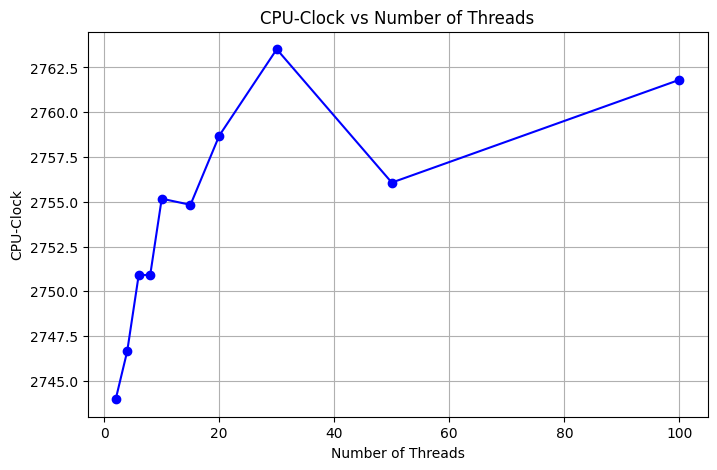

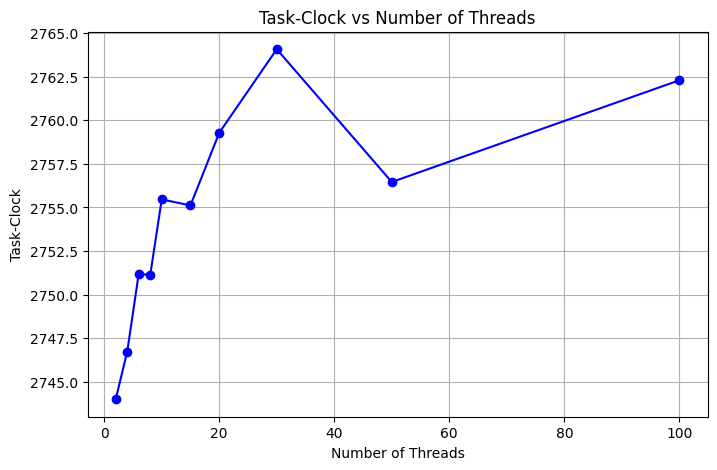

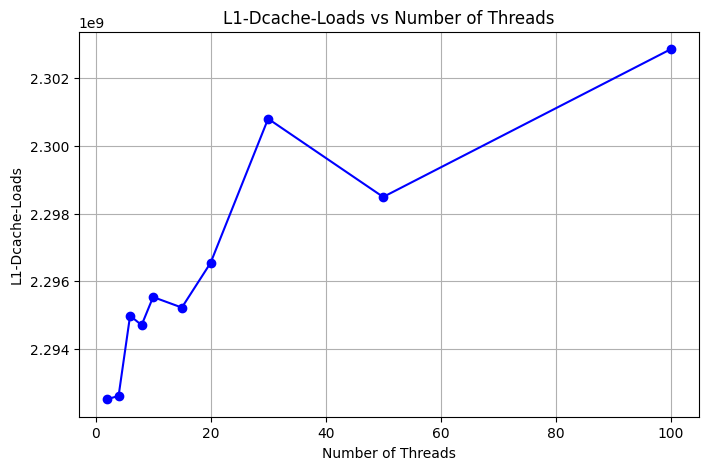

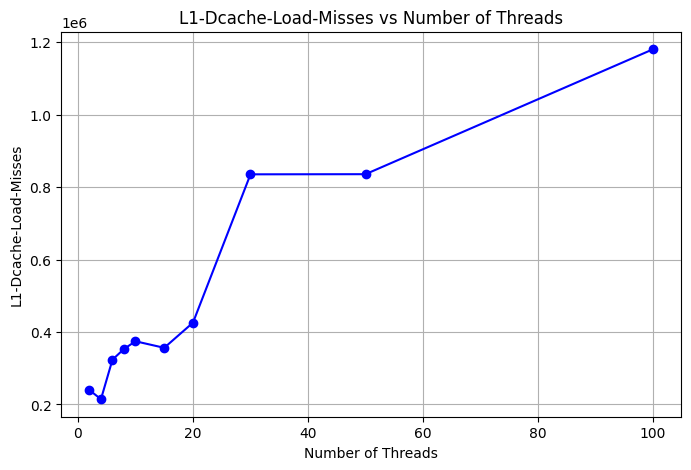

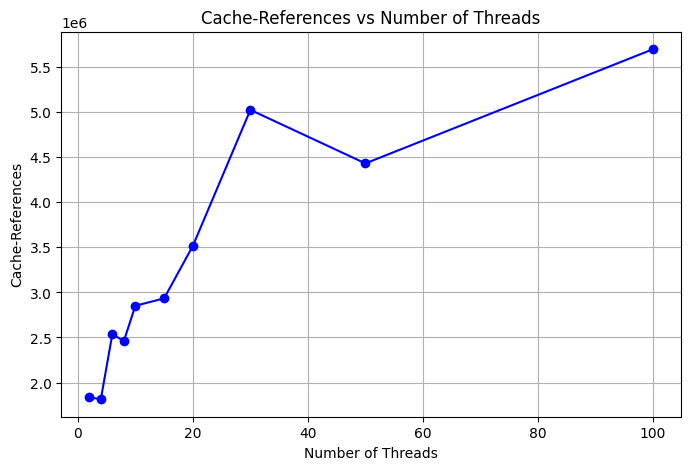

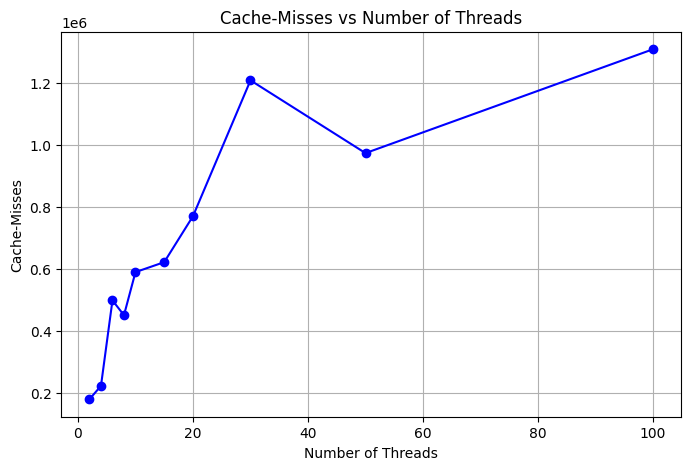

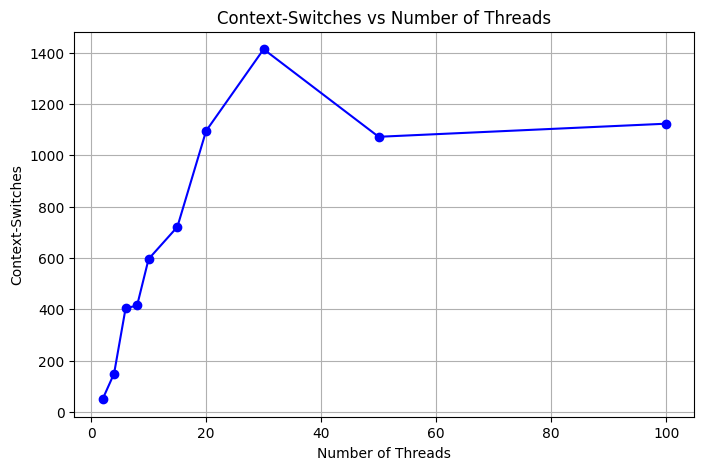

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("1_perf_results.csv")

# Define the metrics to plot
metrics = ["CPU-Clock", "Task-Clock", "L1-Dcache-Loads", "L1-Dcache-Load-Misses", "Cache-References", "Cache-Misses", "Context-Switches"]

# Create separate plots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(data["Threads"], data[metric], marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Threads")
    plt.ylabel(metric)
    plt.title(f"{metric} vs Number of Threads")
    plt.grid(True)
    plt.show()

#### Scalability Performance Summary  

- **CPU & Task Clock:** Remained stable (~2750 ms) across thread counts, indicating efficient CPU utilization.  
- **L1 DCache Loads:** Increased slightly with more threads, peaking at 100 threads (~2.3B).  
- **L1 DCache Misses:** Grew significantly, from ~239K (2 threads) to ~1.18M (100 threads), impacting cache efficiency.  
- **Cache References & Misses:** Increased sharply, showing higher memory contention, peaking at 5.7M references & 1.3M misses (100 threads).  
- **Context Switching:** Rose from 50 (2 threads) to 1123 (100 threads), suggesting higher scheduling overhead.  

**Conclusion:** More threads improve resource usage but lead to higher cache misses and context switching, impacting efficiency at high thread counts.

#### Memory Bound

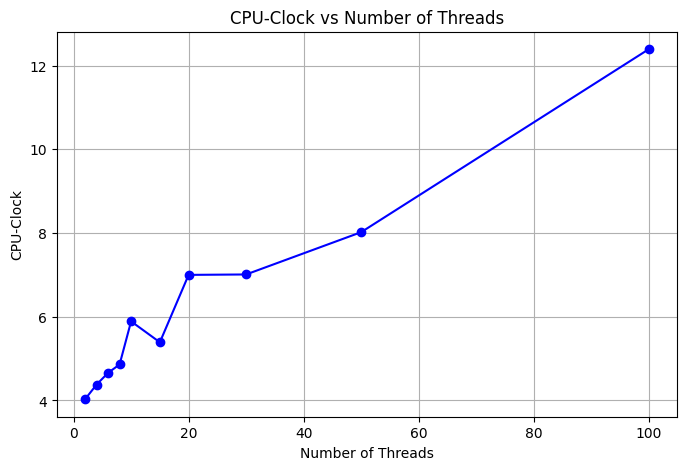

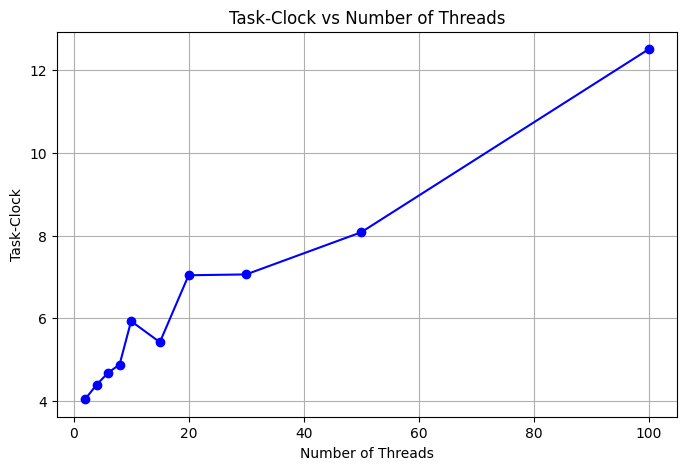

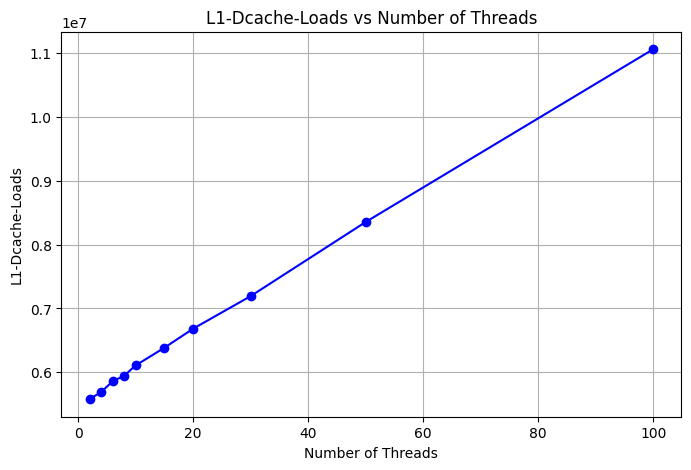

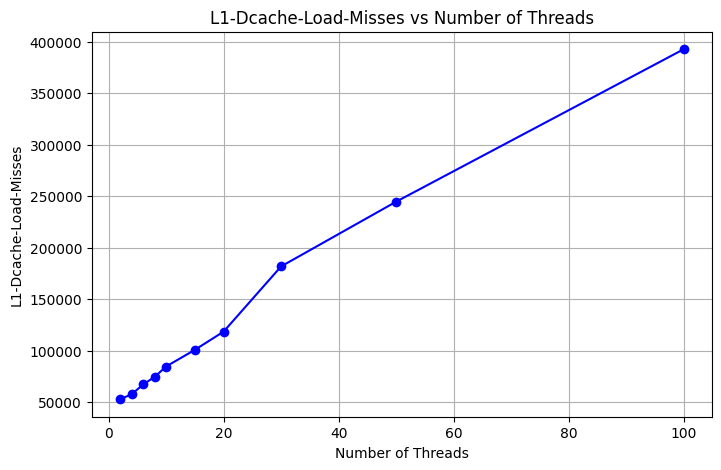

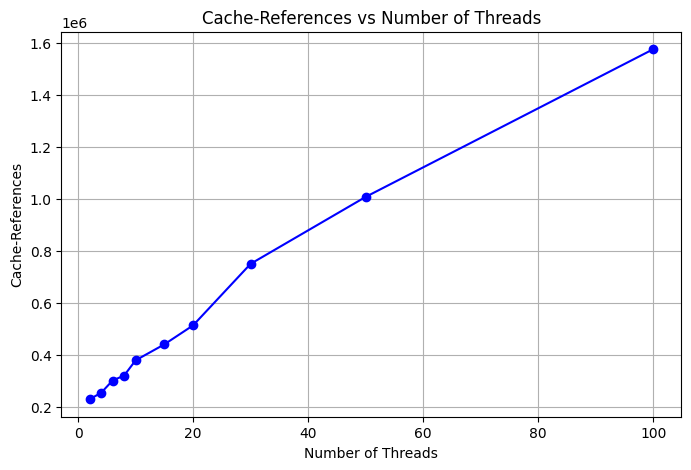

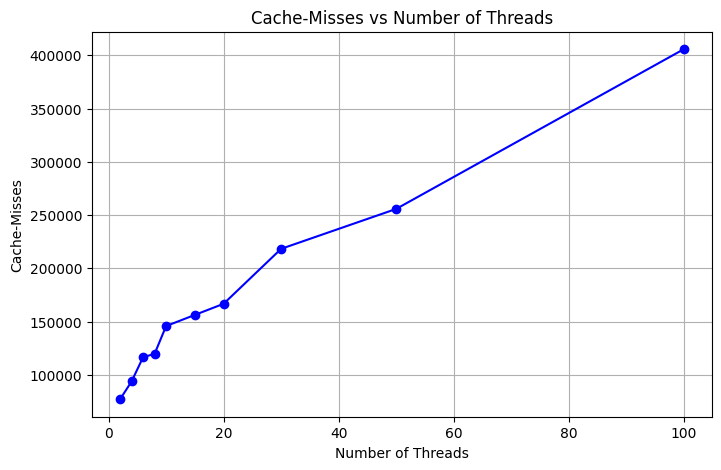

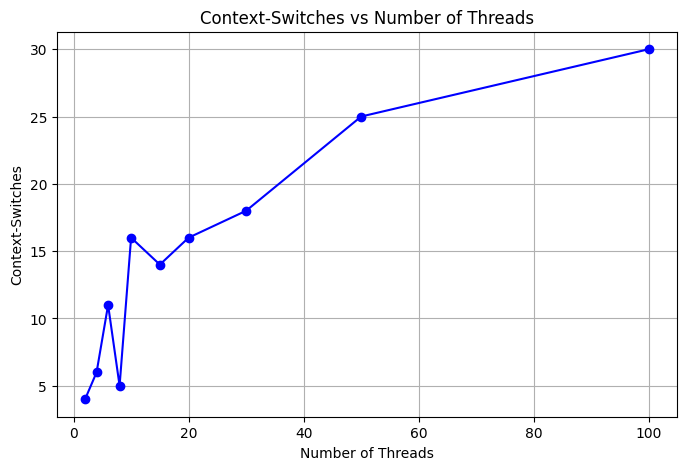

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("2_perf_results.csv")

# Define the metrics to plot
metrics = ["CPU-Clock", "Task-Clock", "L1-Dcache-Loads", "L1-Dcache-Load-Misses", "Cache-References", "Cache-Misses", "Context-Switches"]

# Create separate plots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(data["Threads"], data[metric], marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Threads")
    plt.ylabel(metric)
    plt.title(f"{metric} vs Number of Threads")
    plt.grid(True)
    plt.show()

#### Memory-Bound Scalability Summary  

- **CPU & Task Clock:** Gradually increased with threads, from ~4 ms (2 threads) to ~12.5 ms (100 threads).  
- **L1 DCache Loads:** Grew significantly, peaking at ~11M (100 threads), showing increased memory access.  
- **L1 DCache Misses:** Rose sharply, from ~52K (2 threads) to ~393K (100 threads), reducing cache efficiency.  
- **Cache References & Misses:** Increased with threads, indicating rising memory contention, peaking at ~1.57M references & 405K misses (100 threads).  
- **Context Switching:** Minimal but increased slightly with threads (4 → 30), showing manageable scheduling overhead.  

**Conclusion:** Performance scales but faces growing cache misses and memory contention, impacting efficiency at higher thread counts.

#### I/O bound

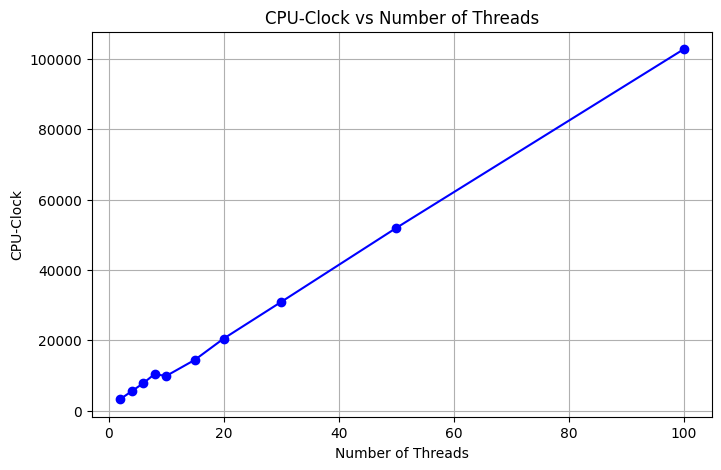

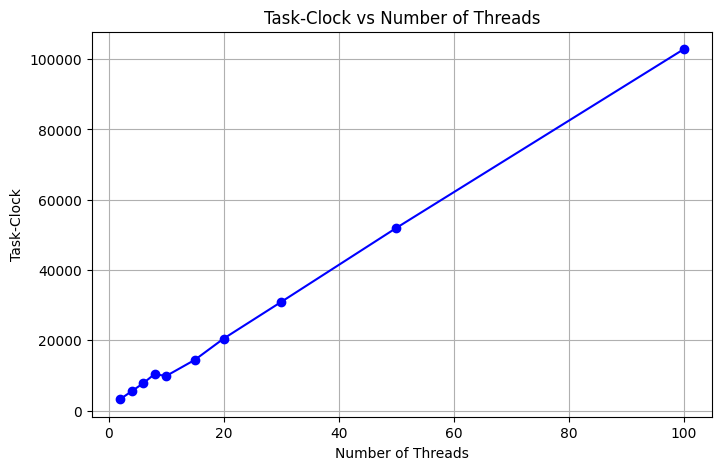

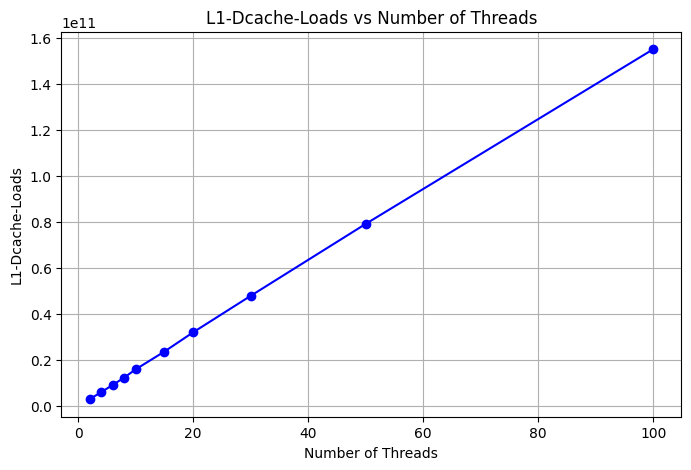

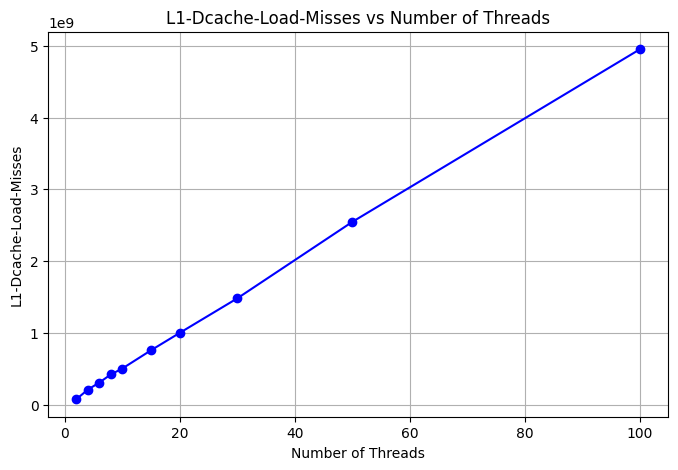

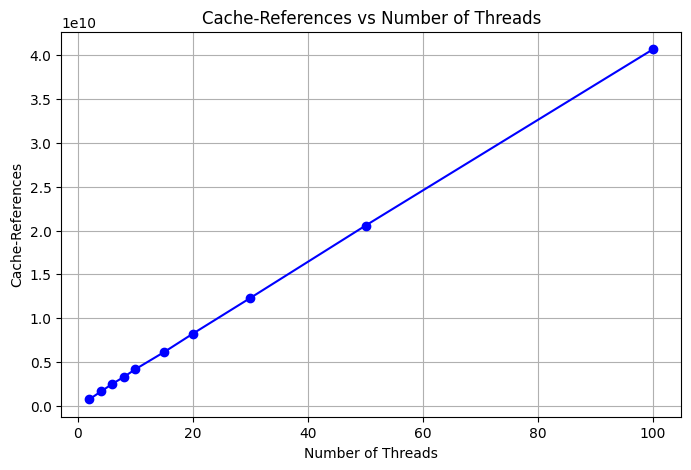

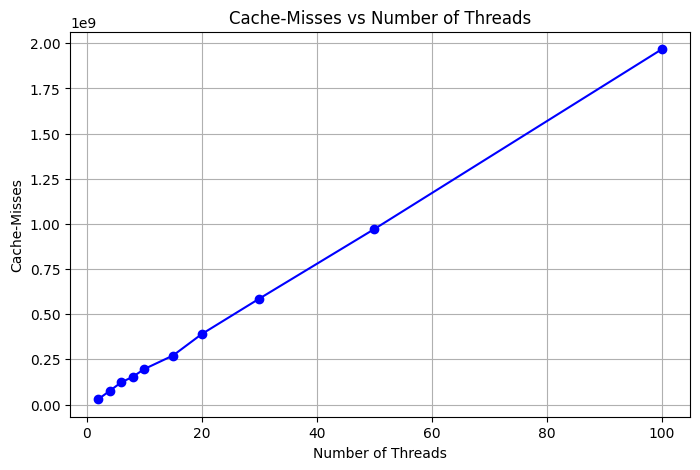

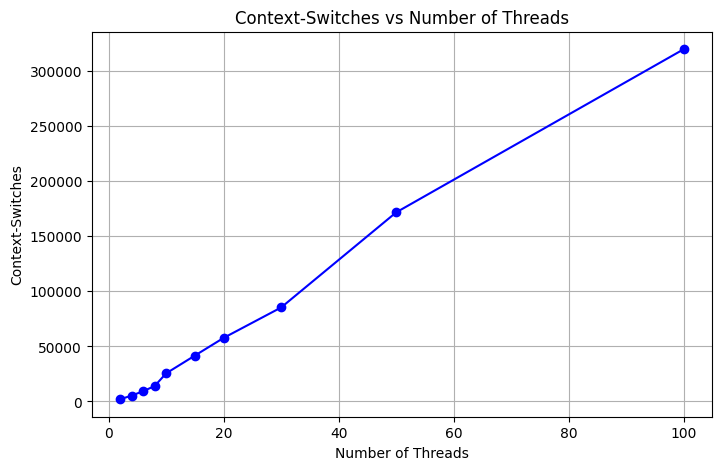

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("3_perf_results.csv")

# Define the metrics to plot
metrics = ["CPU-Clock", "Task-Clock", "L1-Dcache-Loads", "L1-Dcache-Load-Misses", "Cache-References", "Cache-Misses", "Context-Switches"]

# Create separate plots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(data["Threads"], data[metric], marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Threads")
    plt.ylabel(metric)
    plt.title(f"{metric} vs Number of Threads")
    plt.grid(True)
    plt.show()

#### I/O-Bound Scalability Summary  

- **CPU & Task Clock:** Increased significantly with threads, from ~3.2s (2 threads) to ~102.8s (100 threads), indicating high processing demands.  
- **L1 DCache Loads:** Grew drastically, from ~2.7B (2 threads) to ~155B (100 threads), reflecting intensive data operations.  
- **L1 DCache Misses:** Scaled sharply, from ~76M (2 threads) to ~4.95B (100 threads), significantly impacting efficiency.  
- **Cache References & Misses:** Increased substantially, peaking at ~40.6B references & ~1.97B misses (100 threads), showing extreme cache contention.  
- **Context Switching:** Rose sharply from ~2K (2 threads) to ~320K (100 threads), indicating high scheduling overhead.  

**Conclusion:** I/O-bound workload scales poorly with high thread counts due to excessive cache misses and context switching, leading to diminishing efficiency.

#### Mixed Bound

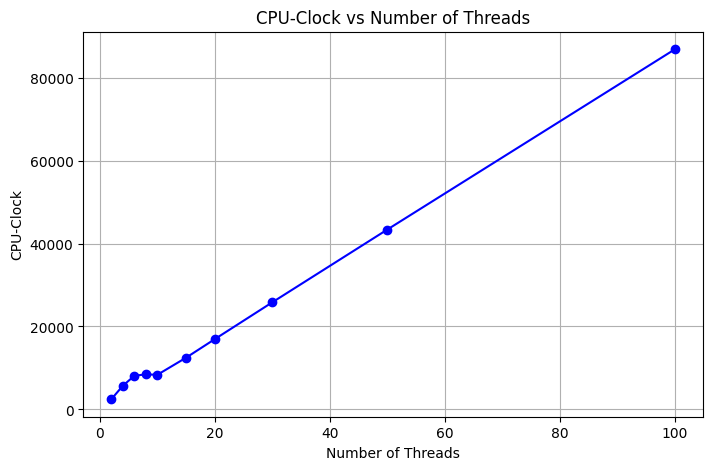

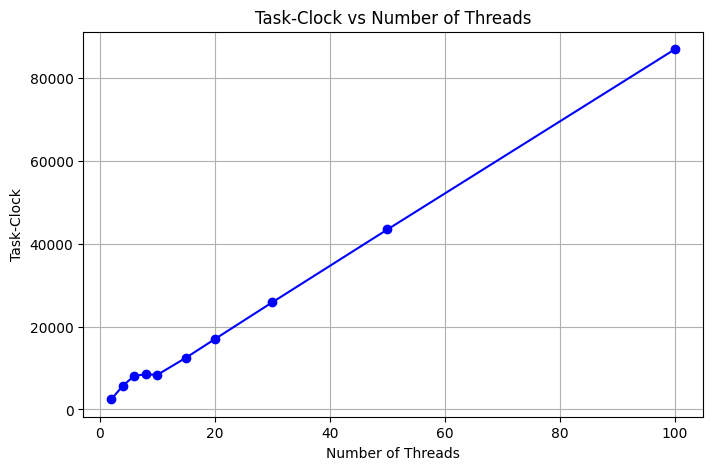

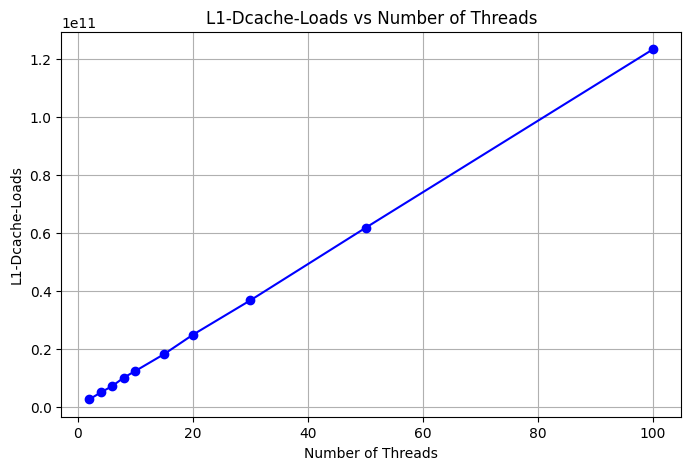

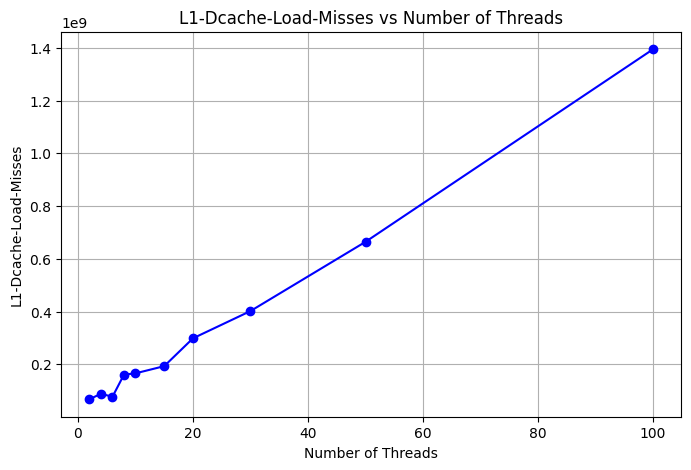

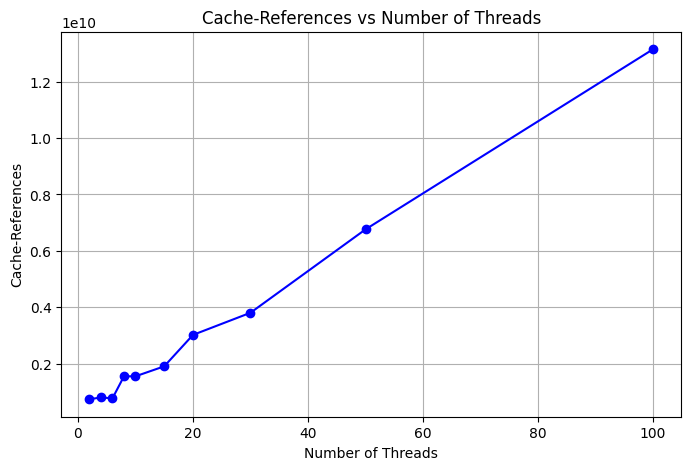

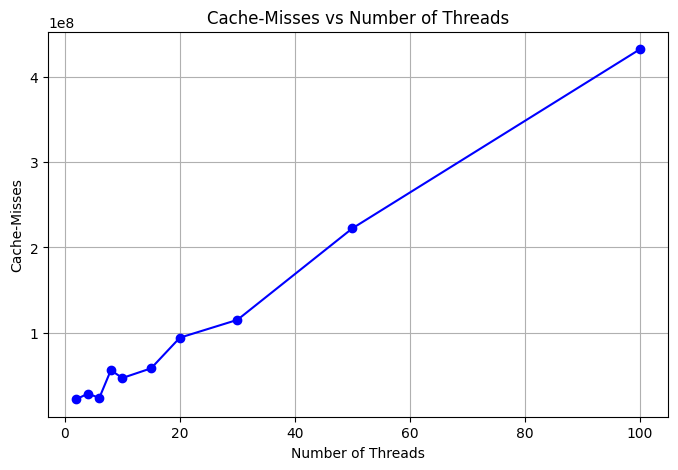

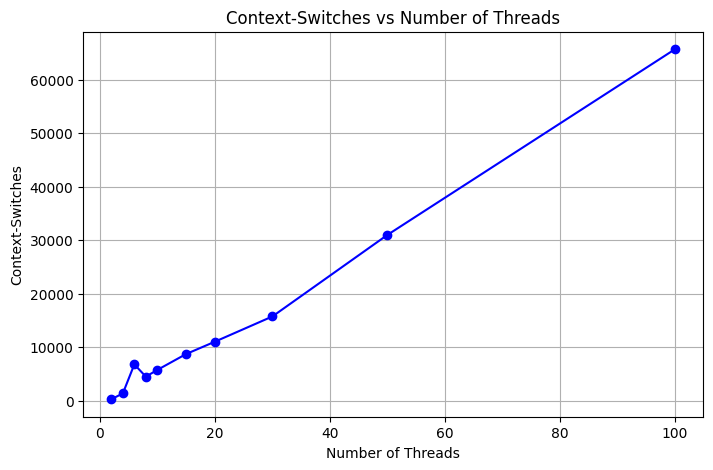

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("4_perf_results.csv")

# Define the metrics to plot
metrics = ["CPU-Clock", "Task-Clock", "L1-Dcache-Loads", "L1-Dcache-Load-Misses", "Cache-References", "Cache-Misses", "Context-Switches"]

# Create separate plots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(data["Threads"], data[metric], marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Threads")
    plt.ylabel(metric)
    plt.title(f"{metric} vs Number of Threads")
    plt.grid(True)
    plt.show()

#### Mixed Workload Scalability Summary  

- **CPU & Task Clock:** Increased significantly from ~2.4s (2 threads) to ~86.8s (100 threads), showing heavy computation.  
- **L1 DCache Loads:** Grew from ~2.7B (2 threads) to ~123B (100 threads), reflecting high memory operations.  
- **L1 DCache Misses:** Increased drastically, from ~68M (2 threads) to ~1.39B (100 threads), reducing cache efficiency.  
- **Cache References & Misses:** Peaked at ~13.1B references & ~432M misses (100 threads), indicating high memory pressure.  
- **Context Switching:** Scaled up from 301 (2 threads) to 65K (100 threads), adding scheduling overhead.  

**Conclusion:** Mixed workload scales better than I/O-bound but suffers from high cache misses and context switching at extreme thread counts, limiting efficiency.